# Linear Coupling

## Elements that induce coupling

Both Skew quadrupole and solenoid bring linear coupling to the two transverse plane. Solenoid is wildly used in low energy injector while skew quadrupole is used for high energy applications. 

###  Skew quadrupole error

For the skew quadrupole, the field reads:
\begin{align}
\Delta B_y+i\Delta B_x &= B_0 \Delta a_1 \left(-y+ix\right)
\end{align}

that can be derived from the vector potential:
\begin{align}
\Delta A_s &= B_0 \Delta a_1 xy
\end{align}

The corresponding Hamiltonian becomes:
\begin{align}
H=\frac{p_x^2}{2}+\frac{p_y^2}{2}+\left(\frac{1}{2\rho^2}+\frac{k(s)}{2} \right) x^2-\frac{k(s)}{2}y^2 - \frac{B_0 \Delta a_1}{B\rho} xy
\end{align}


The Hills equation becomes:
\begin{align}\label{eq:HillEqSQ}
x''+\left(\frac{1}{\rho^2}+k(s)\right)x&= \frac{B_0 \Delta a_1}{B\rho} y \equiv k_s y\\
y''-k(s)y&=\frac{B_0 \Delta a_1}{B\rho}x \equiv k_s x
\end{align}
where $k_s=\frac{B_0 \Delta a_1}{B\rho}$ is the strenght of skew quadrupole.

Inside the skew quad, where the normal quad and dipole terms vanish, the diffential equation becomes:

\begin{align}
x''&=k_s y\\
y''&=k_s x
\end{align}

\begin{align}
u''&=x''+y''=k_s(x+y)=k_su\\
v''&=x''-y''=k_s(y-x)=-k_sv
\end{align}

In a thin length approximation $$f_s=\lim_{l\to 0}\frac{1}{k_s l}$$
The matrix of a skew quadrupole simply reads as:
\begin{equation}
M_{sq}=\left[\begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 1 & 1/f_{s} & 0\\
0 & 0 & 1 & 0\\
1/f_{s} & 0 & 0 & 1
\end{array}\right]
\end{equation}



In [53]:
import sympy as sp
from sympy.physics.quantum import TensorProduct
fs=sp.symbols("f_s")
Msq=sp.eye(4)
Msq[1,2]=1/fs; Msq[3,0]=1/fs

rotang=sp.symbols(r"\theta")
rot2d=sp.Matrix([[sp.cos(rotang), -sp.sin(rotang)],[sp.sin(rotang), sp.cos(rotang)]])
rot4d=TensorProduct(rot2d, sp.eye(2))
rotMsq=sp.simplify(rot4d.subs(rotang, -rotang)*Msq*rot4d)
rotMsq.subs(rotang, -sp.pi/4)

Matrix([
[     1, 0,     0, 0],
[-1/f_s, 1,     0, 0],
[     0, 0,     1, 0],
[     0, 0, 1/f_s, 1]])

### Solenoid

For a solenoid error $B_z$ along the z direction, the treatment for transverse fields has to be modified. 

 For the hard edge model of a solenoid of length $L$, centered at $s_0$:
\begin{align}
B_{z}(s)&=\begin{cases}
B_{0} & \left|s-s_{0}\right|\le L/2\\
0 & \left|s-s_{0}\right|>L/2
\end{cases}
\\
&=B_0 H\left(\frac{L}{2}-\left|s\right|\right)
\end{align}
Here, $H\left(\cdot\right)$ is the Heaviside Step Function.
The vector potential is 
\begin{align}
\mathbf A=\left(-\frac{B_z y}{2}, \frac{ B_z x}{2},0\right)
\end{align}

It is worthwhile to note that this approximation does not satisfy the Maxwell equation at the edge.  To satisfy Maxwell equation in vacuum chamber (no currents), both $\nabla\cdot\mathbf{B}=0$ and $\nabla\times\mathbf{B}=0$.  The vector potential must have be function of transverse coordinates $r$, due to axial symmetric property of solenoid.  Let $\mathbf{A}=\left(-f(r^2,z)\cdot y, f(r^2,z)\cdot x, 0\right)$ then the function $f(w,v)$ has to satisfy:

$$
8f'_w(w,v)+4wf''_{w,w}(w,v)+f''_{v,v}(w,v)=0
$$

We may expand the $f\left(r^2, z\right)$ as Taylor series of r^2 with the coeffecients as function of $z$:
$$
f\left(r^2, z\right)=\sum_{k=0}^{\infty}\frac{C_k(z)}{2(k+1)}r^{2k}
$$

with the field calculate by: 
\begin{align}
B_x&=-x\sum_{k=0}^{\infty}\frac{C'_k(z)}{2(k+1)}r^{2k}\\
B_y&=-y\sum_{k=0}^{\infty}\frac{C'_k(z)}{2(k+1)}r^{2k}\\
B_z&=\sum_{k=0}^{\infty}C_k(z)r^{2k}
\end{align}

with the coefficient satisfying the iterating relation
$$
C_{k+1}=-\frac{C''_k}{4(k+1)^2}
$$

Therefore, any truncation will break the requirement of Maxwell equation.





With the following approximations,
* Paraxial approximation
* Exact energy, i.e. 
The Hamiltonian gives:

\begin{align}
H&=\frac{1}{2}\left(\pi_x-\frac{e}{p_0}A_x\right)^2+\frac{1}{2}\left(\pi_y-\frac{e}{p_0}A_y\right)^2 \\
&=\frac{1}{2}\left(\pi_x+g(s)y\right)^2+\frac{1}{2}\left(\pi_y-g(s)x\right)^2
\end{align}

Here, we have defined the normalized solenoide field $$g(s)=g_sH\left(\frac{L}{2}-\left|s\right|\right)$$ and solenoid strength $g_s$: $$g_s=\frac{eB_0}{2p_0}$$,

Hamiltonian equation gives:
\begin{align}
\frac{dx}{ds}&=\frac{\partial H}{\partial \pi_x}=\pi_x+g(s)y\equiv x'\\
\frac{dy}{ds}&=\frac{\partial H}{\partial \pi_y}=\pi_y-g(s)x\equiv y'\\
\frac{d\pi_x}{ds}&=-\frac{\partial H}{\partial x}=g(s)p_y\\
\frac{d\pi_y}{ds}&=-\frac{\partial H}{\partial y}=-g(s)p_x
\end{align}

Or, we can explicitly write the equation for the particle's transverse momentum :

\begin{align}
\frac{dx}{ds}&=x'\label{eq:eomsol1}\\
\frac{dx'}{ds}&=2g(s)y'+g'(s)y\\
\frac{dy}{ds}&=y'\\
\frac{dy'}{ds}&=-2g(s)x'-g'(s)x\label{eq:eomsol2}
\end{align}





A common trick of the solving $\ref{eq:eomsol1}$ to $\ref{eq:eomsol2}$ is to define a complex variable $w=x+iy$, and its derivative with respect to $s$: $w' = x' + i y'$.  The equation of motion becomes 

\begin{align}
\frac{dw}{ds}&=w'\\
\frac{dw'}{ds}&=-2ig(s)w'-ig'(s)w \label{eq:eomsol_w}\\
\end{align}

The first term on the right-hand side of $\ref{eq:eomsol_w}$ indicates an oscillation of the complex variable $w$.  It hints us to separate the rotation part of the motion by defining:

\begin{align}
w(s)\equiv \tilde{w}(s)e^{i\theta(s)}
\end{align}

Therefore:

\begin{align}
w'(s)&= i\tilde{w}(s)e^{i\theta(s)}\theta '(s)+\tilde{w}'(s)e^{i\theta(s)}\\
w''(s)&= i\tilde{w}(s)e^{i\theta(s)}\theta ''(s)- \tilde{w}(s)e^{i\theta(s)}\theta '^2(s)+2i \tilde{w}'(s)e^{i\theta(s)}\theta '(s)+\tilde{w}''(s)e^{i\theta(s)}\label{eq:form_1}
\end{align}

On the other hand, from $\ref{eq:eomsol_w}$

\begin{align}
\frac{dw'}{ds}&=-2ig(s)w'-ig'(s)w \\
&=-2ig(s)\left(i\tilde{w}(s)e^{i\theta(s)}\theta '(s)+\tilde{w}'(s)e^{i\theta(s)}\right)-ig'(s)\tilde{w}(s)e^{i\theta(s)}\label{eq:form_2}
\end{align}

With trying to match Eq. $\ref{eq:form_1}$ and Eq. $\ref{eq:form_2}$, we can propose $\theta(s)=-\int_{-\infty}^s g(s')ds'$ .  Eq. $\ref{eq:form_1}$ and Eq. $\ref{eq:form_2}$ requires:   

\begin{aligned}
-i\tilde{w}(s)e^{i\theta(s)}g'(s)- &\tilde{w}(s)e^{i\theta(s)}g^2(s)-2i \tilde{w}'(s)e^{i\theta(s)}g(s)+\tilde{w}''(s)e^{i\theta(s)} = \\&-2ig(s)\left(-i\tilde{w}(s)e^{i\theta(s)}g(s)+\tilde{w}'(s)e^{i\theta(s)}\right)-ig'(s)\tilde{w}(s)e^{i\theta(s)}
\end{aligned}

which can be simplified to 

\begin{align}
\tilde{w}''(s)+g^2(s)\tilde{w}(s)=0
\end{align}

Therefore the dynamics under a solenoid field can be viewed, in an rotation frame with angle $\theta(s)=-\int_{-\infty}^s g(s')ds'$, to be a focusing element of both directions, with strength $g^2(s)$.

Combining the focusing effect and the rotation, we have the transfer matrix for a constant-field hard-edge solenoid with length l and solenoid rotation angle $\theta_s=gl$:

\begin{align}
M_{sol}&=
\left[\begin{matrix}
\cos{\left(\theta_{s} \right)} & 0 & - \sin{\left(\theta_{s} \right)} & 0\\
0 & \cos{\left(\theta_{s} \right)} & 0 & - \sin{\left(\theta_{s} \right)}\\ 
\sin{\left(\theta_{s} \right)} & 0 & \cos{\left(\theta_{s} \right)} & 0
\\0 & \sin{\left(\theta_{s} \right)} & 0 & \cos{\left(\theta_{s} \right)}
\end{matrix}\right]
\left[\begin{matrix}
\cos{\left(\theta_{s} \right)} & \frac{\sin{\left(\theta_{s} \right)}}{g_{s}} & 0 & 0\\
- g_{s} \sin{\left(\theta_{s} \right)} & \cos{\left(\theta_{s} \right)} & 0 & 0\\
0 & 0 & \cos{\left(\theta_{s} \right)} & \frac{\sin{\left(\theta_{s} \right)}}{g_{s}}\\
0 & 0 & - g_{s} \sin{\left(\theta_{s} \right)} & \cos{\left(\theta_{s} \right)}
\end{matrix}\right]\\
&=\left[\begin{matrix}\cos^{2}{\left(\theta_{s} \right)} & \frac{\sin{\left(2 \theta_{s} \right)}}{2 g_{s}} & - \frac{\sin{\left(2 \theta_{s} \right)}}{2} & \frac{\cos{\left(2 \theta_{s} \right)} - 1}{2 g_{s}}\\- \frac{g_{s} \sin{\left(2 \theta_{s} \right)}}{2} & \cos^{2}{\left(\theta_{s} \right)} & \frac{g_{s} \left(1 - \cos{\left(2 \theta_{s} \right)}\right)}{2} & - \frac{\sin{\left(2 \theta_{s} \right)}}{2}\\\frac{\sin{\left(2 \theta_{s} \right)}}{2} & \frac{1 - \cos{\left(2 \theta_{s} \right)}}{2 g_{s}} & \cos^{2}{\left(\theta_{s} \right)} & \frac{\sin{\left(2 \theta_{s} \right)}}{2 g_{s}}\\\frac{g_{s} \left(\cos{\left(2 \theta_{s} \right)} - 1\right)}{2} & \frac{\sin{\left(2 \theta_{s} \right)}}{2} & - \frac{g_{s} \sin{\left(2 \theta_{s} \right)}}{2} & \cos^{2}{\left(\theta_{s} \right)}\end{matrix}\right]
\end{align}


##  Linear Coupling Resonance In a Ring

### Hamiltonian approach

We can now combine our discussion of perturbation of linear coupling resonance on the hill's equation with the regular linear terms.  From Eq. $\ref{eq:HillEqSQ}$ and Eq. $\ref{eq:eomsol1}$ to $\ref{eq:eomsol2}$
\begin{align}
&x''+\left(\frac{1}{\rho^2}+k(s)\right)x= k_s y + 2gy'+g'y\\
&y''-k(s)y= k_s x- 2gx'-g'x
\end{align}
which is derived from the Hamiltonian:
\begin{equation}\label{eq:lc_h}
H=\frac{1}{2}\left(\pi_x^2+\pi_y^2+K_x x^2+K_y y^2+g^2\left(x^2+y^2\right)\right)-k_sxy+\pi_xgy-\pi_ygx
\end{equation}
The first part is the unperturbed terms, contains the focusing from the normal quad, dipole and the focusing effect of the solenoid, the rest is the linear coupling potential.
\begin{equation}\label{eq:coupling_potential}
V_{lc}(x,y)=-k_sxy+\pi_xgy-\pi_ygx
\end{equation}




Using Floquet transformation, the 'coupling potential' can be expressed by the action-angle $(J_{x/y}, \psi{x/y})$ variable and expanded with Fourier transfromation with respect to the independent variable $\theta=s/R$:
\begin{align}\label{eq:floquet}
J_{x}&=\frac{1}{2\beta_x}\left[x^2+\left(\beta_x x'+\alpha_x x\right)^2\right]\\
\phi_x&=\psi_x - \int_0^s\frac{ds'}{\beta(s')} + \nu_x \theta
\end{align}
and similar treats applies to vertical direction.

Then inverse transformation can be used to replace the $(x,\pi_x,y,\pi_y)$ in the potential.  Then, consider the potential is a periodic funtion of the independent variable $\theta$, we can expand it as Fourier series:

\begin{equation}\label{eq:coupling_potential_fourier}
V_{lc}(\theta)=\sqrt{J_x J_y}\sum_l \left(G_{1,-1,l}e^{-i\left(\phi_x-\phi_y-l\theta+\chi_-\right)}+G_{1,1,l}e^{-i\left(\phi_x+\phi_y-l\theta+\chi_+\right)}+\text{c.c.}\right)
\end{equation}

|Resonances             | Name| Constant|
|----------             |-----|---------|
|$\nu_x-\nu_y=l$        |Diff. Resonance| $J_x+J_y$ |
|$\nu_x+\nu_y=l$        |Sum Resonance| $J_x-J_y$ |

Depend on the choice of the tune, one resonance may dominate over the other.  The potential can also be approximated by the corresponding term.  By changing the varible of introducing the new phase of the resonance phase, we can prove that the sum or difference of the action of two planes remains constant.

<IPython.core.display.Javascript object>


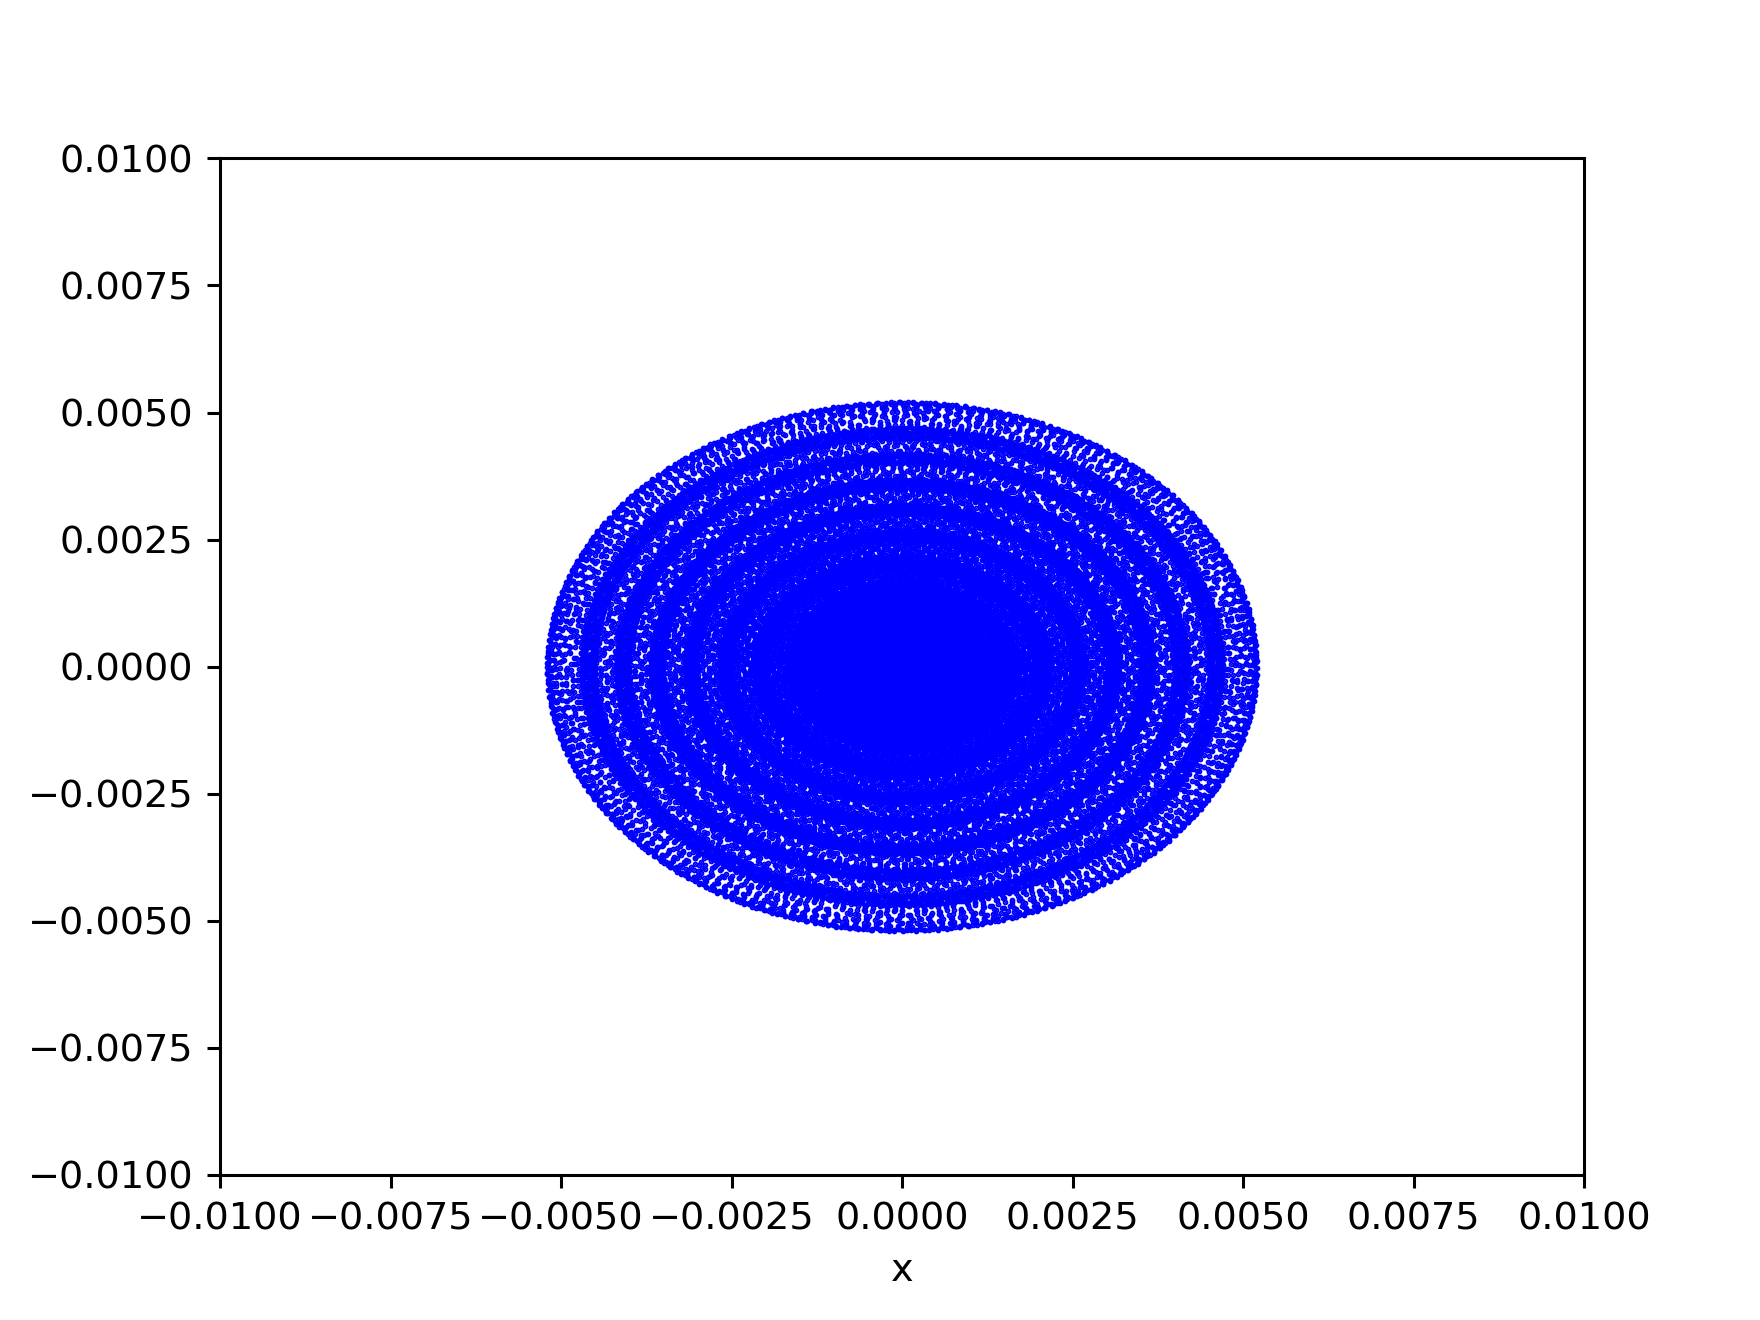

In [14]:
from map2D import map2D
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import animation
#from IPython.display import HTML
%matplotlib notebook

tunex=0.223
dtune=0.005
tuney= 1-tunex+dtune # Sum resonance
#tuney= tunex+dtune  # Diff resonance

pxs=0.0005*np.arange(10)
pxps=np.zeros_like(pxs)
#pxs=0.005*np.cos(np.linspace(0,np.pi, 10))
#pxps=0.005*np.sin(np.linspace(0,np.pi, 10))

particles=np.vstack([pxs,pxps])
xpx=map2D(npart=10, twiss=[1,0], twiss_beam=[1,0], tune=tunex, chrom=0.0, espr=0.0,
                  particles=particles)

pys=0.004*np.ones(10)
pyps=np.zeros_like(pys)
particles=np.vstack([pys,pyps])
ypy=map2D(npart=len(pxs), twiss=[1,0], twiss_beam=[1,0],tune=tuney, chrom=0.0, espr=0.0,
          particles=particles, 
          emit=0.1e-6)

avex,avep,sizex,sizep,emit=xpx.statistics()
emitlist=[]
sizelist=[]
avelist=[]
N_turn=5000


def evolve_func(turns, kick_turn_start=0, ks=-0.005,
               ):
    for i in range(turns):
        if i>=kick_turn_start:
            xpx.coor2D[1,:]+=ks*ypy.coor2D[0,:]
            ypy.coor2D[1,:]+=ks*xpx.coor2D[0,:]
        
        xpx.propagate()
        ypy.propagate()
        
        #avex,avep,sizex,sizep,emit=xpx.statistics()
        #avelist.append(avex)
        #sizelist.append(sizex)
        #emitlist.append(emit)
        yield xpx.coor2D, ypy.coor2D
        
evolve=evolve_func(N_turn+2)
    
fig,ax=plt.subplots()
ax.set_xlim([-0.01,0.01])
ax.set_ylim([-0.01,0.01])
xlist=[]
xplist=[]
ylist=[]
yplist=[]


for i in range(N_turn):
    arrx, arry=next(evolve)
    #if np.max(arr)>1: break
    xlist.append(arrx[0])
    xplist.append(arrx[1])
    ylist.append(arry[0])
    yplist.append(arry[1])
xarr=np.vstack(xlist)
xparr=np.vstack(xplist)
yarr=np.vstack(ylist)
yparr=np.vstack(yplist)
ax.plot(xarr,xparr,linestyle='None', marker='.', c='b', markersize=1)
ax.set_xlabel('x')
Jx=xarr*xarr+xparr*xparr
Jy=yarr*yarr+yparr*yparr


<IPython.core.display.Javascript object>


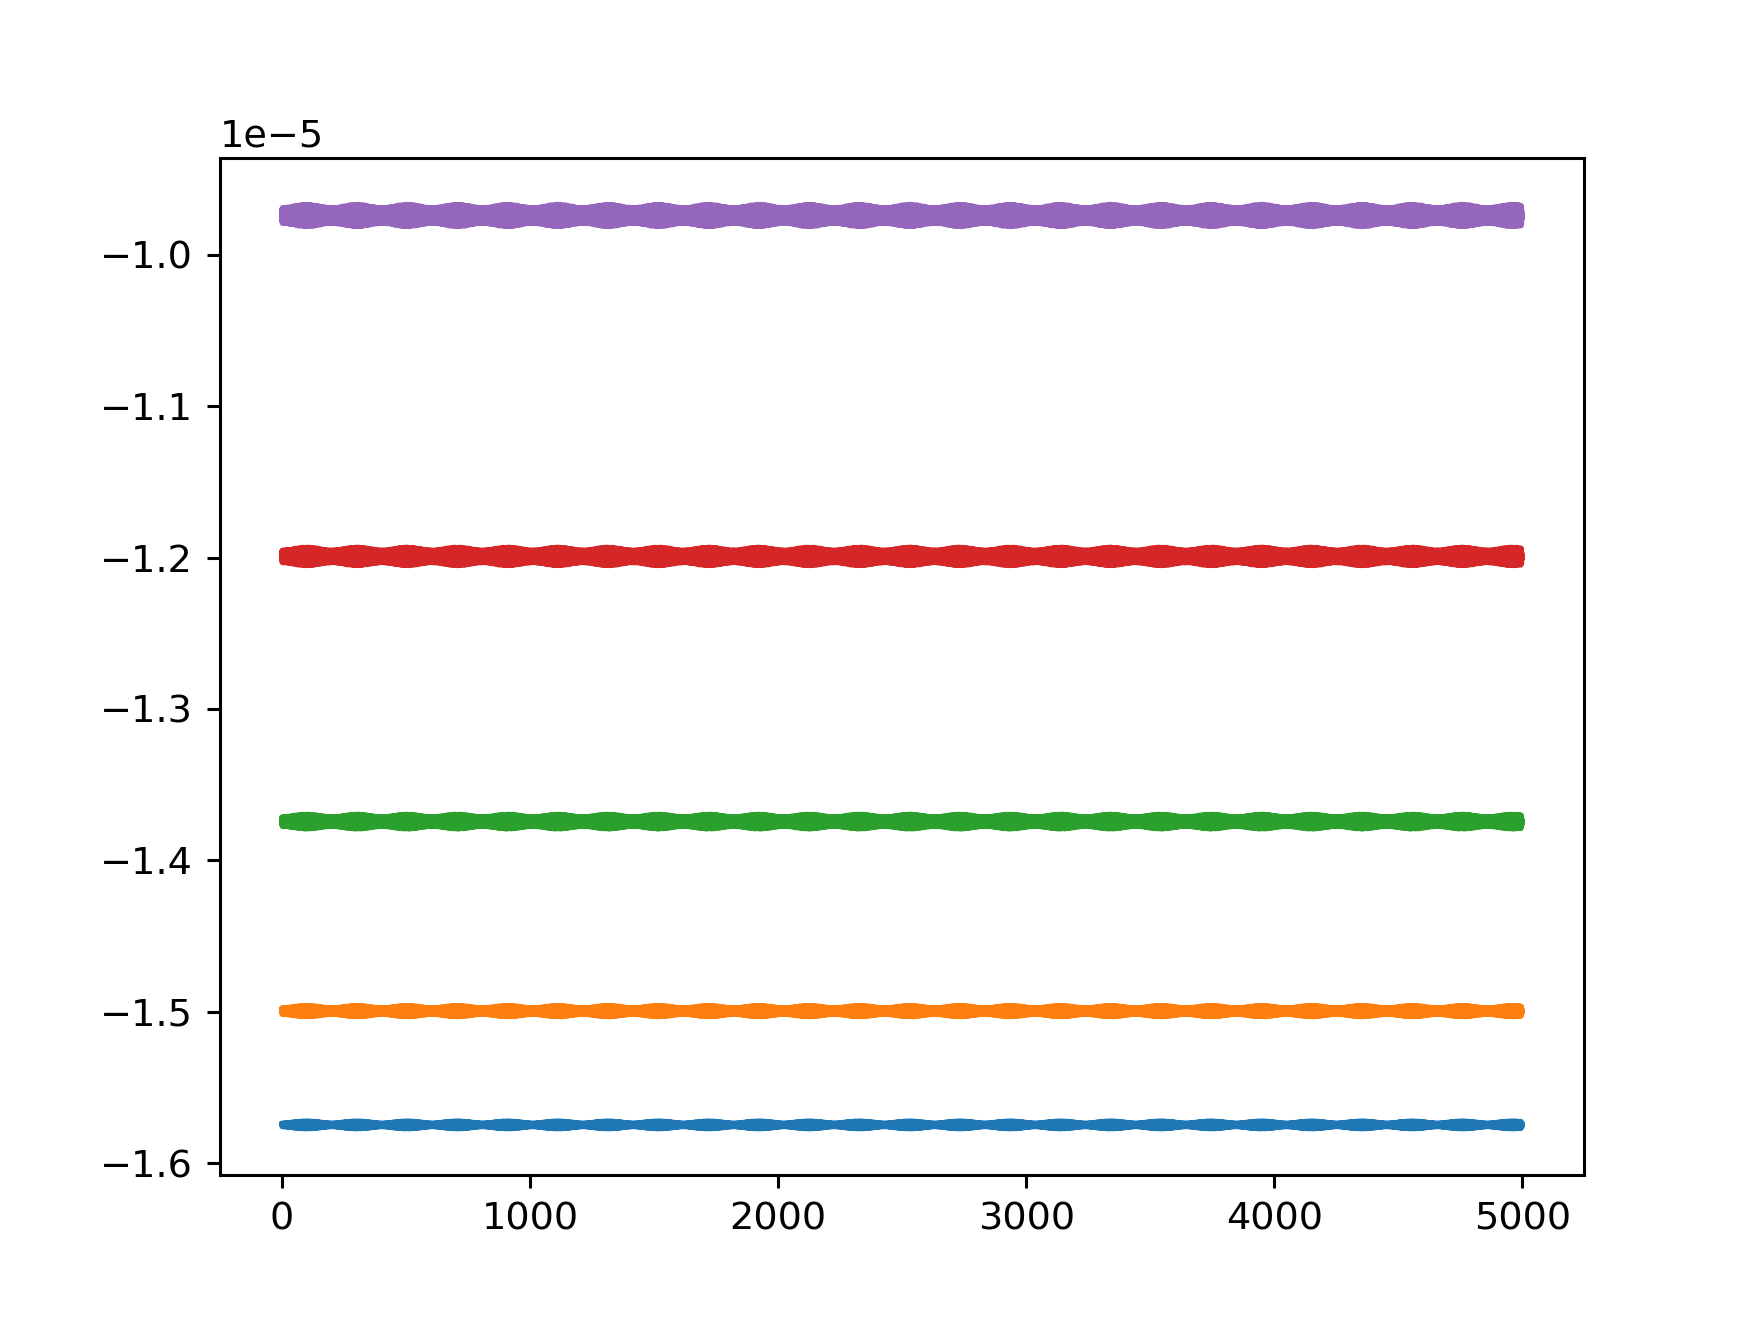

In [16]:
fig,ax=plt.subplots()
#ax.set_xlim([1000,15000])
for i in range(5):
    ax.plot(Jx[:,i+1]-Jy[:,i+1])


### Matrix approach, Edward-Teng Parametrization

All the linear elements, dipole, quads, skew quads and solinoids can be represented by the matrix and the one turn matrix can be found by multiplying them in order.  The final one-turn matrix should have a general $4\times 4$ matrix in the block matrix form:

\begin{equation}
M=\left(\begin{array}{cc}
A & B\\
C & D
\end{array}\right)
\end{equation}


The symplectic matrix M has 10 free parameters since the symplectic condition provides 6 constrains which can be written as:


\begin{align}
\det A  = \det D &\equiv a  \label{symplectic4_det1}\\
\det B = \det C &\equiv b   \label{symplectic4_det2}\\
a+b&=1   \label{symplectic4_det3}
\end{align}

and

\begin{align}
\bar{A}B+\bar{C}D=0 \label{symplectic4_cross1} \\
A\bar{C}+B\bar{D}=0 \label{symplectic4_cross2} 
\end{align}

Here the notation $\bar{A}$ of matrix $A$ is the symplectic conjugate $-SA^TS$. Note that the relation \ref{symplectic4_cross1} and \ref{symplectic4_cross2} are not independent and only contribute 3 constrains besides the constrains from the determinants.

There are multiple ways to analyze the one-turn matrix. Among them, the Edward-Teng parametrization provides a clear physical interpretation. In this approach, a similarity transformation found from couple Matrix $M$ to an uncoupled matrix:

\begin{equation}
U\left(\begin{array}{cc}
A & B\\
C & D
\end{array}\right)U^{-1}=
\left(\begin{array}{cc}
M_x & 0\\
0 & M_y
\end{array}\right) \label{similarity_transformation}
\end{equation}
where $U$ is a symplectic matrix.


Out of the 10 free parameter in coupled matrix $M$, the decoupled matrix $M_x$ and $M_y$ contributes 6 free parameter, therefore the simplest form of transformation $U$ need to have 4 free parameters.  Let $U$ have the following form:
\begin{equation}
U=\left(\begin{array}{cc}
\alpha I & -\bar{R}\\
R & \alpha I
\end{array}\right)
\end{equation}
where a real positive parameter $\alpha$ and a matrix $R$ is to be determined. This form satisfies the relation $\ref{symplectic4_det1}$, $\ref{symplectic4_det2}$, $\ref{symplectic4_cross1}$ and $\ref{symplectic4_cross2}$  automatically. The constrain $\ref{symplectic4_det3}$ requires

\begin{equation}
\alpha^2+\det R=1 \label{r_determinant_1}
\end{equation}



Therefore, the relation \ref{similarity_transformation} yields:
\begin{equation}
\left(\begin{matrix}\alpha^{2} M_{x} + \bar{R} M_{y} R & - \alpha M_{x} \bar{R} + \alpha \bar{R} M_{y}\\- \alpha R M_{x} + \alpha M_{y} R & \alpha^{2} M_{y} + R M_{x} \bar{R}\end{matrix}\right) =\left(\begin{array}{cc}
A & B\\
C & D
\end{array}\right)
\end{equation}

From the relation for $B$ and $C$, we reach:
\begin{equation}
BR=\bar{R}C \label{EDTeng1}
\end{equation}

On the other hand, the uncoupled matrix $M_x$ can be calculated from the relation of $A$ and $C$, while $M_y$ can be calculated from the relation of $B$ and $D$:
\begin{align}
M_x&=A-\frac{1}{\alpha}\bar{R}C=A-\frac{1}{\alpha}BR \\
M_y&=D+\frac{1}{\alpha}RB
\end{align}

Then back to the relation of $A$ and $D$ and using $BR=\bar{R}C$, we have 
\begin{equation}
\alpha\left(RA-DR\right) = \left(1-2\alpha^2\right)C \label{EDTeng2}
\end{equation}

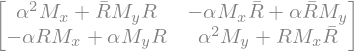

In [14]:
import sympy 
sympy.init_printing(use_unicode=True)
alpha=sympy.symbols(r"\alpha")
a=sympy.MatrixSymbol('A', 2,2)
b=sympy.MatrixSymbol('B', 2,2)
c=sympy.MatrixSymbol('C', 2,2)
d=sympy.MatrixSymbol('D', 2,2)
mx=sympy.MatrixSymbol('M_x', 2,2)
my=sympy.MatrixSymbol('M_y', 2,2)
r=sympy.MatrixSymbol('R', 2,2)
rc=sympy.MatrixSymbol(r'\bar{R}', 2,2)
s_2=sympy.MatrixSymbol('S_2', 2,2)

zero=sympy.ZeroMatrix(2,2)
identity=sympy.Identity(2)
Mcouple=sympy.BlockMatrix([[a,b],[c,d]])
Mdecouple=sympy.BlockMatrix([[mx,zero],[zero,my]])
#sympy.block_collapse(M*ss*M.T)
U=sympy.BlockMatrix([[alpha*identity,-rc],[r,alpha*identity]])
Uinv=sympy.BlockMatrix([[alpha*identity,rc],[-r,alpha*identity]])
sympy.block_collapse(Uinv*Mdecouple*U)

Now we have to guess the form of $R$.  Using the relation of the equal determinant of $B$ and $C$, a smart solution of $R$ can be:
\begin{equation}
R=\kappa \left(\bar{B}+C\right) \label{solution_r}
\end{equation}
where $\kappa$ is a real parameter to be determined. Here we have assumed $\bar{B}+C\ne0$, otherwise, $R$ becomes zero, which is not the desired solution when $B$ and $C$ are non zero.

The relation $\ref{r_determinant_1}$ becomes:
\begin{equation}
\alpha^2+\kappa^2\left(2\det B+\DeclareMathOperator{\Tr}{Tr} \Tr(BC)\right)=1 \label{alphakappa1}
\end{equation}

The uncoupled matrix $M_x$ can be written as:
\begin{align}
M_x&= A-\frac{\kappa}{\alpha}\left(\left(\det B\right)I +BC\right)\\
M_y&= D+\frac{\kappa}{\alpha}\left(\left(\det B\right)I +CB\right)
\end{align}



Using the solution of $R$ (Eq. \ref{solution_r}), the equation Eq. \ref{EDTeng2} becomes:
\begin{equation}
\alpha\kappa(\DeclareMathOperator{\Tr}{Tr} \Tr A-\Tr D)=1-2\alpha^2 \label{alphakappa2}
\end{equation}

Combining Eq \ref{alphakappa1} and \ref{alphakappa2}, we can get the equation for the ratio $\kappa/\alpha$.  After defining two new parameters:
\begin{aligned}
\lambda &\equiv \DeclareMathOperator{\Tr}{Tr} (\Tr A-\Tr D)/2\\
\xi&\equiv 2\det B+\DeclareMathOperator{\Tr}{Tr} \Tr(BC)
\end{aligned}
We can solve  $\kappa/\alpha$ from:
\begin{equation}
\xi \left(\frac{\kappa}{\alpha}\right)^2 -2 \lambda\left(\frac{\kappa}{\alpha}\right)-1=0
\end{equation}

To have a real solution, we demand $\Delta\equiv\lambda^2+\xi \ge 0$ and get the solution:
\begin{equation}
\frac{\kappa}{\alpha}=\frac{\lambda\pm\sqrt{\Delta}}{\xi}
\end{equation}
Both solutions are valid. 

To ensure the coupled one-turn map is stable, we are interested in the trace of $M_x$ and $M_y$.
\begin{align}
\DeclareMathOperator{\Tr}{Tr}
\Tr M_x&= (\Tr A + \Tr D)/2 \mp \sqrt{\Delta}\\
\Tr M_y&= (\Tr A + \Tr D)/2 \pm \sqrt{\Delta}
\end{align}

Therefore we also get the stablity of 4D matrix in block form:
\begin{align}
\left|\frac{\Tr A + \Tr D}{2} \pm \sqrt{\Delta}\right| \lt 2
\end{align}

Here is a example using FODO cell, with one quad rotating clockwise while the other quad rotate counterclockwise by same angle.  Will the FODO lattice remain stable?

In [84]:
import sympy as sp
from sympy.physics.quantum import TensorProduct
import numpy as np

def smat(dim=2):
    s2=sp.Matrix([[0,1],[-1,0]])
    if dim==2:
        return s2
    return TensorProduct(sp.eye(dim//2), s2)
    
def quad4d(fx, rotang=None):
    Mq=sp.eye(4)
    f=sp.symbols("f")
    Mq[1,0]=1/f; Mq[3,2]=-1/f
    Mq=Mq.subs(f,fx)
    rang=sp.symbols(r"\theta")
    if rotang is not None:
        rot2d=sp.Matrix([[sp.cos(rang), -sp.sin(rang)],[sp.sin(rang), sp.cos(rang)]])
        rot4d=TensorProduct(rot2d, sp.eye(2))
        return sp.simplify(rot4d.subs(rang, -rotang)*Mq*rot4d.subs(rang, rotang))
    
    return Mq

def drift4d(l_drift):
    Md=sp.eye(4)
    l=sp.symbols("l")
    Md[0,1]=l; Md[2,3]=l
    return Md.subs(l, l_drift)
    
def symp_conj_2by2(m):
    return sp.Matrix([[m[1,1], -m[0,1]],
                     [-m[1,0], m[0,0]]
                     ])
def np_symp_conj_2by2(m):
    return np.array([[m[1,1], -m[0,1]],
                     [-m[1,0], m[0,0]]
                     ])

f=sp.symbols("f")
l=sp.symbols("l")
l=f
rotang=sp.symbols(r"\theta")
s4=smat(4)
FODO_rot=(quad4d(-2*f, sp.pi/4+rotang)*drift4d(l)*quad4d(f,sp.pi/4+rotang)*drift4d(l)*quad4d(-2*f, sp.pi/4+rotang))
#FODO_rot=(drift4d(l)*quad4d(f,0*sp.pi/4+rotang)*drift4d(l)*quad4d(-f, 0*sp.pi/4+rotang))
sp.simplify(FODO_rot.subs(rotang, 0))

Matrix([
[     1/2, 2*f,        0,  -f],
[-1/(2*f), 1/2, -1/(4*f),   0],
[       0,  -f,      1/2, 2*f],
[-1/(4*f),   0, -1/(2*f), 1/2]])

In [87]:
A=FODO_rot[0:2,0:2]
C=FODO_rot[2:,0:2]
B=FODO_rot[0:2,2:]
D=FODO_rot[2:,2:]


bbarc=symp_conj_2by2(B)+C

display(sp.simplify(bbarc))
display(sp.simplify(symp_conj_2by2(A)-D))

xi=sp.simplify(2*B.det()+sp.trace(B*C))
lbd=sp.simplify((sp.trace(A)-sp.trace(D))/2)
delta=(lbd*lbd+xi)
display(sp.simplify(delta))

k_ov_alpha=(lbd-sp.sqrt(delta))/xi
M_x=A-k_ov_alpha*(B.det()*sp.eye(2)+B*C)
M_y=D-k_ov_alpha*(B.det()*sp.eye(2)+C*B)

trm1=(sp.trace(A)+sp.trace(D))/2+sp.sqrt(delta)
trm2=(sp.trace(A)+sp.trace(D))/2-sp.sqrt(delta)
#display(sp.simplify(trm1))
#display(sp.simplify(trm2))
#display(sp.simplify(M_x[0,1]))
#display(sp.simplify(M_y[0,1]))

Matrix([
[0, 0],
[0, 0]])

Matrix([
[  0, -4*f],
[1/f,    0]])

0

TypeError: cannot add <class 'sympy.matrices.immutable.ImmutableDenseMatrix'> and <class 'sympy.core.numbers.NaN'>

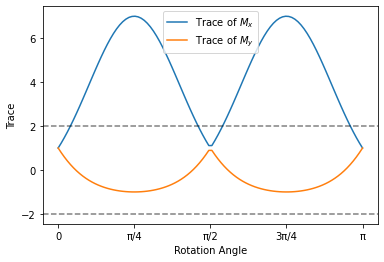

In [50]:
import numpy as np
import matplotlib.pyplot as plt

ftrm1=sp.lambdify(rotang, trm1)
ftrm2=sp.lambdify(rotang, trm2)

ang=np.linspace(0,np.pi, 100)
tracex=ftrm1(ang)
tracey=ftrm2(ang)
fig,ax=plt.subplots()
ax.plot(ang, tracex, label=r'Trace of $M_x$')
ax.plot(ang, tracey, label=r'Trace of $M_y$')
plt.xticks(np.linspace(0, np.pi, 5), ['0','π/4','π/2','3π/4','π'])
ax.axhline(2, ls='--', color='k',alpha=0.5, )
ax.axhline(-2, ls='--', color='k',alpha=0.5,)
ax.set_xlabel("Rotation Angle")
ax.set_ylabel("Trace")
ax.legend(loc='best')